In [4]:
import numpy as np
import ZebraLib as zb
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import itertools

In [2]:
it = int(10)

Cr = np.linspace(0.05, 0.85, it)
Af = np.linspace(0.05, 1, it)
b = np.linspace(0.88, 3, it)

A = (list(itertools.product(Cr, Af, b)))

Cr_list, Af_list, b_list, Cp_list, Cm_list = [], [], [], [], []
for elem in A:
    Cr_list.append(elem[0])
    Af_list.append(elem[1])
    b_list.append(elem[2])
    Cp_list.append(elem[0]*elem[1])
    Cm_list.append((2/3)*elem[0]*((1+elem[1]+elem[1]**2)/(1+elem[1])))

df = pd.DataFrame({'Cr':Cr_list, 'Cp':Cp_list, 'Cm':Cm_list, 'Af':Af_list, 'b':b_list})
df['S'] = (df['Cr']+df['Cp'])*df['b']*(0.5)
df['AR'] = df['b']/df['Cm']

filtro = df

N, Slo, Slo2, Slo3 = [], [], [], []
for x in tqdm(range(len(filtro.index))):
    Zb = zb.Airplane(Load=6, Tc=((-0.001, -0.225, 35.225)))
    Zb.b = filtro['b'].iloc[x]; Zb.AR = filtro['AR'].iloc[x] 
    Zb.c = filtro['Cm'].iloc[x]; Zb.Af = filtro['Af'].iloc[x]; Zb.S = filtro['S'].iloc[x]
    Zb.params_Calc

    N.append(Zb.save('D:/Aviões_gerados_teste.xlsx', False))
    #Slo.append(Zb.takeOff_Distance_AproxMiranda())
    Slo3.append(Zb.takeOff_Distance_AproxMiranda())

df2 = pd.DataFrame(N)
df2['Slo'] = Slo3

df2.to_excel('D:/MDO_variando_tração.xlsx')

"it = int(50)\n\nCr = np.linspace(0.05, 0.85, it)\nAf = np.linspace(0.05, 1, it)\nb = np.linspace(0.88, 3, it)\n\nA = (list(itertools.product(Cr, Af, b)))\n\nCr_list, Af_list, b_list, Cp_list, Cm_list = [], [], [], [], []\nfor elem in A:\n    Cr_list.append(elem[0])\n    Af_list.append(elem[1])\n    b_list.append(elem[2])\n    Cp_list.append(elem[0]*elem[1])\n    Cm_list.append((2/3)*elem[0]*((1+elem[1]+elem[1]**2)/(1+elem[1])))\n\ndf = pd.DataFrame({'Cr':Cr_list, 'Cp':Cp_list, 'Cm':Cm_list, 'Af':Af_list, 'b':b_list})\ndf['S'] = (df['Cr']+df['Cp'])*df['b']*(0.5)\ndf['AR'] = df['b']/df['Cm']\n\nfiltro = df\n\nN, Slo, Slo2, Slo3 = [], [], [], []\nfor x in tqdm(range(len(filtro.index))):\n    Zb = zb.Airplane(Load=6)\n    Zb.b = filtro['b'].iloc[x]; Zb.AR = filtro['AR'].iloc[x] \n    Zb.c = filtro['Cm'].iloc[x]; Zb.Af = filtro['Af'].iloc[x]; Zb.S = filtro['S'].iloc[x]\n    Zb.params_Calc\n\n    N.append(Zb.save('D:/Aviões_gerados_teste.xlsx', False))\n    #Slo.append(Zb.takeOff_Distance_A

In [5]:
df2 = pd.read_excel('D:/MDO_dados_miranda_certo_50.xlsx')

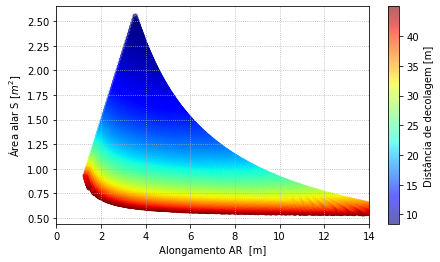

In [7]:
df = df2[(df2['Slo'] > 0) & (df2['Slo'] <= 45)]

#Muito bom
fig, ax = plt.subplots(figsize=(7, 4))

ax.set(xlim=(0, 14), xlabel=r'Alongamento AR  [m]', ylabel=r'Área alar S $[m^2]$')
e = ax.scatter( df.AR, df.S, marker='o', alpha=.6,  
                c=df.Slo, cmap='jet', s= 20, rasterized=True)

cbar = plt.colorbar(e)
cbar.set_label('Distância de decolagem [m]')
ax.grid(ls='dotted')
fig.savefig(f'MDO_AR.pdf', bbox_inches='tight', dpi=200)
  

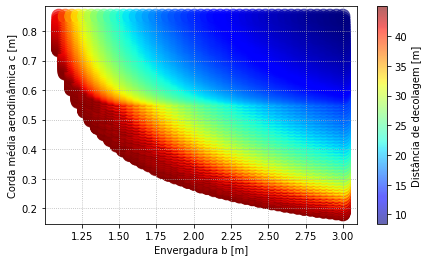

In [11]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.set(xlabel=r'Envergadura b [m]', ylabel=r'Corda média aerodinâmica c [m]')
e = ax.scatter( df.b, df.c, marker='o', alpha=.6,  
                c=df.Slo, cmap='jet', s= 200, rasterized=True)

cbar = plt.colorbar(e)
cbar.set_label('Distância de decolagem [m]')
ax.grid(ls='dotted')
fig.savefig(f'MDO_corda.pdf', bbox_inches='tight', dpi=200)